**description:** Since the launch of Bitcoin in 2008, hundreds of similar projects based on the blockchain technology have emerged. We call these cryptocurrencies (also coins or cryptos in the Internet slang).

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('fivethirtyeight')
current = pd.read_csv('7.csv')
current.head(10)

,Unnamed: 0,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,0,9.007640e+09,1.672352e+07,bitcoin,1512549554,2.130493e+11,2.100000e+07,Bitcoin,0.12,7.33,17.45,1.000000,12739.500000,1,BTC,1.672352e+07
1,1,1.551330e+09,9.616537e+07,ethereum,1512549553,4.352945e+10,NaN,Ethereum,-0.18,-3.93,-7.33,0.036177,452.652000,2,ETH,9.616537e+07
2,2,1.111350e+09,1.684044e+07,bitcoin-cash,1512549578,2.529585e+10,2.100000e+07,Bitcoin Cash,1.65,-5.51,-4.75,0.120050,1502.090000,3,BCH,1.684044e+07
3,3,2.936090e+09,2.779530e+09,iota,1512549571,1.475225e+10,2.779530e+09,IOTA,-2.38,83.35,255.82,0.000424,5.307460,4,MIOTA,2.779530e+09
4,4,2.315050e+08,3.873915e+10,ripple,1512549541,9.365343e+09,1.000000e+11,Ripple,0.56,-3.70,-14.79,0.000019,0.241754,5,XRP,9.999309e+10


## filtering and reproducibility

In [ ]:
market_cap_raw = current[['id', 'market_cap_usd']]
market_cap_raw.count()


id                1326
market_cap_usd    1031
dtype: int64

## Filtering out rows

In [ ]:
cap = market_cap_raw.query('market_cap_usd > 0')
cap.count()

id                1031
market_cap_usd    1031
dtype: int64

### How big is Bitcoin compared with the rest of the cryptocurrencies?

In [ ]:
TOP_CAP_TITLE = "Top 10 market capitalization"
TOP_CAP_YLABEL = "% of total cap"

In [ ]:
cap10 = cap.head(10).set_index(cap.id[:10])
cap10

,id,market_cap_usd
id,,
bitcoin,bitcoin,2.130493e+11
ethereum,ethereum,4.352945e+10
bitcoin-cash,bitcoin-cash,2.529585e+10
iota,iota,1.475225e+10
ripple,ripple,9.365343e+09
dash,dash,5.794076e+09
litecoin,litecoin,5.634498e+09
bitcoin-gold,bitcoin-gold,4.920065e+09
monero,monero,4.331688e+09


In [ ]:
cap10 = cap10.assign(market_cap_perc =
                    lambda x: (x.market_cap_usd / cap.market_cap_usd.sum()))

Text(0, 0.5, '% of total cap')

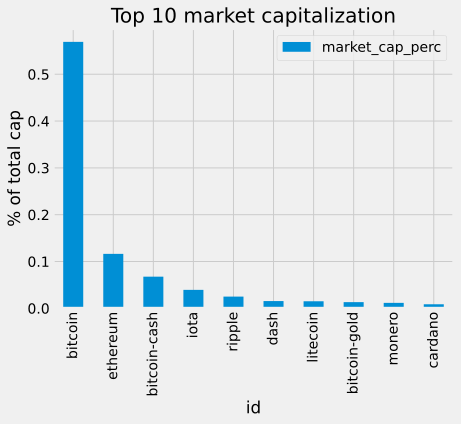

In [ ]:
ax = cap10.plot.bar(x = 'id', y = 'market_cap_perc', title = TOP_CAP_TITLE)
ax.set_ylabel(TOP_CAP_YLABEL)

## Plot informative

Text(0.5, 0, '')

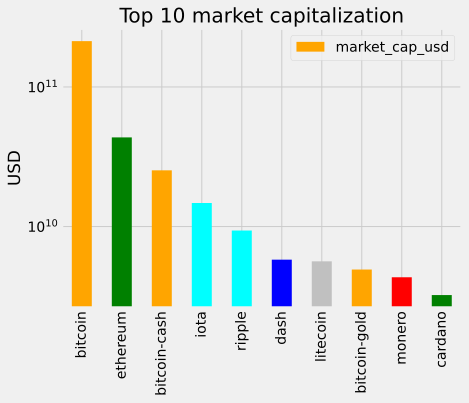

In [ ]:
COLORS = ['orange', 'green', 'orange', 'cyan', 'cyan', 'blue', 'silver', 'orange', 'red', 'green']
ax = cap10.plot.bar(x = 'id', y = 'market_cap_usd', logy = True, color = COLORS, title = TOP_CAP_TITLE)
ax.set_ylabel('USD')
ax.set_xlabel('')

### plot 24 hours and 7 days percentage change

In [ ]:
volatility = current[['id', 'percent_change_24h', 'percent_change_7d']]
volatility.head(10)

,id,percent_change_24h,percent_change_7d
0,bitcoin,7.33,17.45
1,ethereum,-3.93,-7.33
2,bitcoin-cash,-5.51,-4.75
3,iota,83.35,255.82
4,ripple,-3.70,-14.79
5,dash,-3.31,10.64
6,litecoin,0.80,3.68
7,bitcoin-gold,-8.65,-11.24
8,monero,25.65,41.23
9,cardano,-5.80,-8.25


In [ ]:
nan_counts = current[['percent_change_24h', 'percent_change_7d']].isna().sum(axis=1)
nan_counts

0       0
1       0
2       0
3       0
4       0
       ..
1321    1
1322    0
1323    0
1324    0
1325    1
Length: 1326, dtype: int64

In [ ]:
volatility = volatility.set_index('id').dropna()
volatility = volatility.sort_values('percent_change_24h', ascending = True)
volatility.head()

,percent_change_24h,percent_change_7d
id,,
flappycoin,-95.85,-96.61
credence-coin,-94.22,-95.31
coupecoin,-93.93,-61.24
tyrocoin,-79.02,-87.43
petrodollar,-76.55,542.96


In [ ]:
nan_counts_vol = volatility[['percent_change_24h', 'percent_change_7d']].isna().sum(axis=1)
nan_counts_vol

id
flappycoin       0
credence-coin    0
coupecoin        0
tyrocoin         0
petrodollar      0
                ..
eaglecoin        0
beatcoin         0
bitzeny          0
cashcoin         0
fedoracoin       0
Length: 1239, dtype: int64

## Plot top 10 biggest gainers and top 10 losers in market capitalization

### percent change 24h

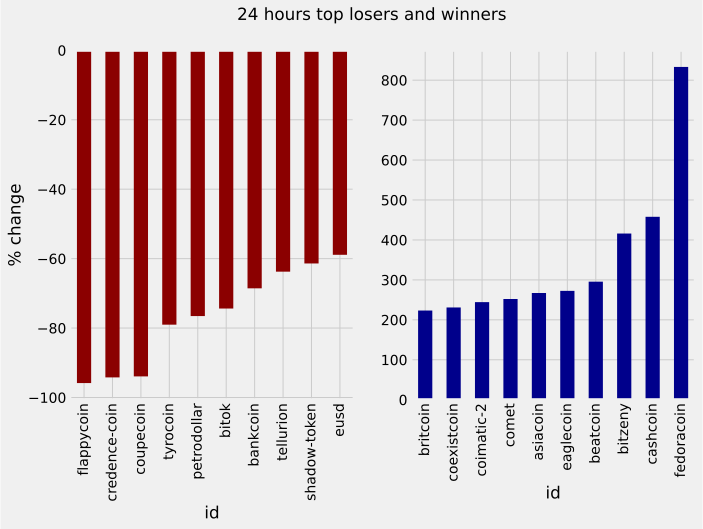

In [ ]:
#Defining a function with 2 parameters, the series to plot and the title
def top10_subplot(volatility_series, title):
    # Making the subplot and the figure for two side by side plots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

    # Plotting with pandas the barchart for the top 10 losers
    ax = (volatility_series[:10].plot.bar(color = 'darkred', ax = axes[0]))

    # Setting the figure's main title to the text passed as parameter
    # ... YOUR CODE FOR TASK 7 ...
    fig.suptitle(title)
    # Setting the ylabel to '% change'
    # ... YOUR CODE FOR TASK 7 ...
    ax.set_ylabel('% change')
    # Same as above, but for the top 10 winners
    ax = (volatility_series[-10:].plot.bar(color = 'darkblue', ax = axes[1]))

    # Returning this for good practice, might use later
    return fig, ax

DTITLE = "24 hours top losers and winners"

# Calling the function above with the 24 hours period series and title DTITLE
fig, ax = top10_subplot(volatility.percent_change_24h, DTITLE)


### percent change 7d

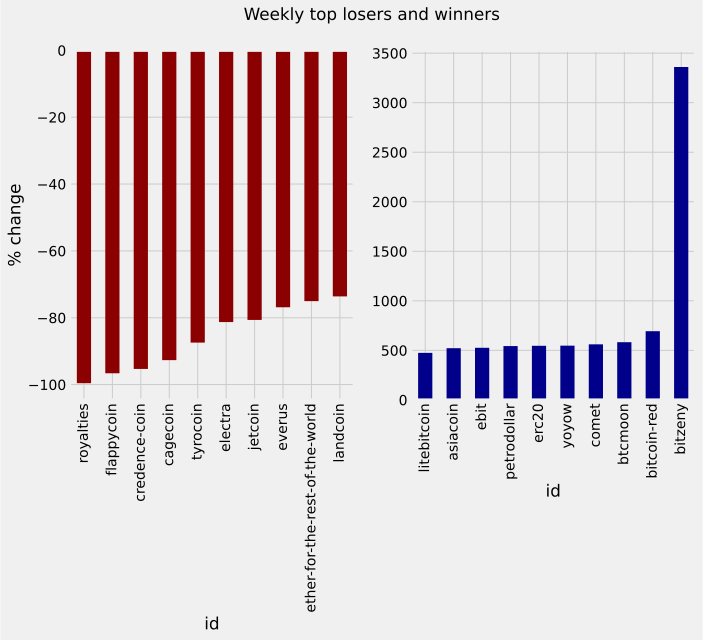

In [ ]:
volatility7d = volatility.sort_values('percent_change_7d', ascending = True)
WTITLE = "Weekly top losers and winners"
fig, ax = top10_subplot(volatility7d.percent_change_7d, WTITLE)


### categorize

<BarContainer object of 3 artists>

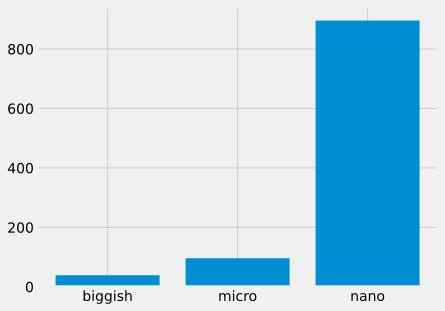

In [ ]:
def capcount(query_string):
    return cap.query(query_string).count().id

LABELS = ["biggish", "micro", "nano"]
biggish = capcount('market_cap_usd > 300000000')
micro = capcount('market_cap_usd > 50000000 & market_cap_usd < 300000000')
nano =  capcount('market_cap_usd < 50000000')
values = (biggish, micro, nano)
plt.bar(range(len(values)), values, tick_label = LABELS)